#📌 Extracción

In [244]:
import requests
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [245]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


#🔧 Transformación

In [246]:
# Normalización de datos
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Ensamblar los DataFrame
df_DB= pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                customer_df,
                phone_df,
                internet_df,
                account_df], axis=1)
df_DB.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [247]:
df_DB.info()
df_DB.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [248]:

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
    'PaymentMethod', 'Churn'
]
for col in categorical_cols:
    if col in df_DB.columns:
        print(f"Valores únicos en '{col}': {df_DB[col].unique()}")
        print(f"Conteo de valores en '{col}':\n{df_DB[col].value_counts()}\n")
        print(f"Total de valores en '{col}': {df_DB[col].value_counts().sum()}\n")

Valores únicos en 'gender': ['Female' 'Male']
Conteo de valores en 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Total de valores en 'gender': 7267

Valores únicos en 'Partner': ['Yes' 'No']
Conteo de valores en 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Total de valores en 'Partner': 7267

Valores únicos en 'Dependents': ['Yes' 'No']
Conteo de valores en 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Total de valores en 'Dependents': 7267

Valores únicos en 'PhoneService': ['Yes' 'No']
Conteo de valores en 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Total de valores en 'PhoneService': 7267

Valores únicos en 'MultipleLines': ['No' 'Yes' 'No phone service']
Conteo de valores en 'MultipleLines':
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Total de valores en 'MultipleLines': 7267

Valores únicos en

In [249]:
import numpy as np

df_DB.replace(r'^\s*$', np.nan, regex=True, inplace=True)

print("\nVerificando valores nulos (incluyendo strings vacíos):")
print(df_DB.isnull().sum())  # Conteo de nulos por columna


Verificando valores nulos (incluyendo strings vacíos):
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [250]:
df_DB = df_DB.dropna(subset=['Churn'])
print("\nVerificando valores nulos (incluyendo strings vacíos):")
print(df_DB.isnull().sum())  # Conteo de nulos por columna


Verificando valores nulos (incluyendo strings vacíos):
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [251]:
total_rows = df_DB.shape[0]
print(f"Número total de filas en df_DB {total_rows}")
unique_customer_ids = df_DB['customerID'].nunique()
print(f"Número de customerID únicos: {unique_customer_ids}")
if total_rows > unique_customer_ids:
    print("\n¡ADVERTENCIA: Hay customerID duplicados en el DataFrame!")
else:
    print("\nTodos los customerID son únicos.")

Número total de filas en df_DB 7043
Número de customerID únicos: 7043

Todos los customerID son únicos.


In [252]:
df_DB

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [253]:
df_DB.loc[:, 'Cargo diario'] = df_DB['Charges.Monthly'] / 30
df_DB.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cargo diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [254]:
#Buscar valores nulos
df_DB.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [255]:
#Buscar valores únicos
df_DB.nunique()

,0
customerID,7043
Churn,2
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3


In [256]:
#columnas string
colum_string = ['customerID','Churn','gender','Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling',
                'PaymentMethod']
#columnas boolean
column_bool = ['SeniorCitizen']

In [257]:
# Mostrar los valores únicos de las columnas de tipo string

for column in colum_string:
    print({column})
    print(df_DB[column].unique())
    print("\n")

{'customerID'}
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


{'Churn'}
['No' 'Yes']


{'gender'}
['Female' 'Male']


{'Partner'}
['Yes' 'No']


{'Dependents'}
['Yes' 'No']


{'PhoneService'}
['Yes' 'No']


{'MultipleLines'}
['No' 'Yes' 'No phone service']


{'InternetService'}
['DSL' 'Fiber optic' 'No']


{'OnlineSecurity'}
['No' 'Yes' 'No internet service']


{'OnlineBackup'}
['Yes' 'No' 'No internet service']


{'DeviceProtection'}
['No' 'Yes' 'No internet service']


{'TechSupport'}
['Yes' 'No' 'No internet service']


{'StreamingTV'}
['Yes' 'No' 'No internet service']


{'StreamingMovies'}
['No' 'Yes' 'No internet service']


{'Contract'}
['One year' 'Month-to-month' 'Two year']


{'PaperlessBilling'}
['Yes' 'No']


{'PaymentMethod'}
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']




In [258]:
df_DB.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cargo diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [259]:
# Verificar si PhoneService = No tiene MultiplesLines = Yes
df_DB[(df_DB['PhoneService'] == 'No') & (df_DB['MultipleLines'] == 'Yes')]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cargo diario


In [260]:
# Verificar si IntenetService = No tiene 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies' = Yes
df_DB[(df_DB['InternetService'] == 'No') & (df_DB['OnlineSecurity'] == 'Yes') & (df_DB['OnlineBackup'] == 'Yes')
& (df_DB['DeviceProtection'] == 'Yes') & (df_DB['TechSupport'] == 'Yes')
& (df_DB['StreamingTV'] == 'Yes') & (df_DB['StreamingMovies'] == 'Yes')]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cargo diario


In [261]:
df_DB['OnlineSecurity'] = df_DB['OnlineSecurity'].replace('No internet service', -1)
df_DB['OnlineBackup'] = df_DB['OnlineBackup'].replace('No internet service', -1)
df_DB['DeviceProtection'] = df_DB['DeviceProtection'].replace('No internet service', -1)
df_DB['TechSupport'] = df_DB['TechSupport'].replace('No internet service', -1)
df_DB['StreamingTV'] = df_DB['StreamingTV'].replace('No internet service', -1)
df_DB['StreamingMovies'] = df_DB['StreamingMovies'].replace('No internet service', -1)
#Multiples lineas
df_DB['MultipleLines'] = df_DB['MultipleLines'].replace('No phone service', -1)

In [262]:
# Colocar la columna InternetService No en No internet service
df_DB['InternetService'] = df_DB['InternetService'].replace('No', 'No internet service')

In [263]:
#Convertir las columnas de tipo string
df_DB[colum_string] = df_DB[colum_string].astype(str)
#Convertir las columnas de tipo booleano
df_DB[column_bool] = df_DB[column_bool].astype(float)
#Convertir las columnas de tipo numérico
df_DB['Charges.Total'] = pd.to_numeric(df_DB['Charges.Total'], errors='coerce')
#Reemplazar los valores NaN en la columna 'Charges.Total' con 0
df_DB['Charges.Total'] = df_DB['Charges.Total'].fillna(0)
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   float64
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [264]:
total_rows = df_DB.shape[0]
print(f"Número total de filas en df_DB: {total_rows}")
unique_customer_ids = df_DB['customerID'].nunique()
print(f"Número de customerID únicos: {unique_customer_ids}")
if total_rows > unique_customer_ids:
    print("\n¡Atención!. Hay customerID duplicados en el DataFrame!")
else:
    print("\nTodos los customerID son únicos.")

Número total de filas en df_DB: 7043
Número de customerID únicos: 7043

Todos los customerID son únicos.


In [265]:
# Iterar sobre columnas para reemplazar Yes y No por 0 y 1
for column in colum_string:
    df_DB[column] = df_DB[column].replace({'Yes': 1, 'No': 0})

for column in column_bool:
    df_DB[column] = df_DB[column].replace({True: 1, False: 0})

/tmp/ipython-input-2670663650.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_DB[column] = df_DB[column].replace({'Yes': 1, 'No': 0})


In [266]:
df_DB

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cargo diario
0,0002-ORFBO,0,Female,0.0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0.0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0.0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1.0,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1.0,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0.0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0.0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0.0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0.0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [267]:
#Cambiar el nombre de las columnas para español
# Definir un diccionario con los nuevos nombres de las columnas
new_column_names = {
    'customerID': 'ID Cliente',
    'Churn': 'Abandono',
    'gender': 'Género',
    'SeniorCitizen': 'Mayor de 65 años',
    'Partner': 'Tiene Pareja',
    'Dependents': 'Tiene Dependientes',
    'tenure': 'Duración del Contrato (meses)',
    'PhoneService': 'Servicio Telefónico',
    'MultipleLines': 'Múltiples Líneas',
    'InternetService': 'Servicio de Internet',
    'OnlineSecurity': 'Seguridad en Línea',
    'OnlineBackup': 'Respaldo en Línea',
    'DeviceProtection': 'Protección del Dispositivo',
    'TechSupport': 'Soporte Técnico',
    'StreamingTV': 'TV por Cable',
    'StreamingMovies': 'Streaming de Películas',
    'Contract': 'Tipo de Contrato',
    'PaperlessBilling': 'Facturación Sin Papel',
    'PaymentMethod': 'Método de Pago',
    'Charges.Monthly': 'Costo Mensual',
    'Charges.Total': 'Costo Total',
    'Charges.Diary': 'Costo Diario'
}

# Renombramos las columnas
df_DB.rename(columns=new_column_names, inplace=True)

In [268]:
# Diccionarios de entrada y reemplazo
replacement_dict = {
    'Género': {'Female': 'F', 'Male': 'M'},
    'Servicio de Internet': {'Fiber optic': 'Fibra Óptica'},
    'Tipo de Contrato':{'One year': 'Anual' ,'Month-to-month': 'Mensual' ,'Two year': 'Bianual'},
    'Método de Pago':{'Mailed check':'Cheque por Correo', 'Electronic check':'Cheque electrónico' ,'Credit card (automatic)':'Tarjeta de crédito (automático)','Bank transfer (automatic)': 'Transferencia bancaria (automático)'}
}

# Reemplazar datos en el DataFrame usando los diccionarios
for column, replacements in replacement_dict.items():
    df_DB[column] = df_DB[column].replace(replacements)

df_DB.head()

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Cargo diario
0,0002-ORFBO,0,F,0.0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.186667
1,0003-MKNFE,0,M,0.0,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por Correo,59.9,542.40,1.996667
2,0004-TLHLJ,1,M,0.0,0,0,4,1,0,Fibra Óptica,...,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,1,M,1.0,1,0,13,1,0,Fibra Óptica,...,1,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,1,F,1.0,1,0,3,1,0,Fibra Óptica,...,0,1,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.796667


#📊 Carga y análisis

In [269]:
#Analisis descriptivo
df_DB.describe(include='all')

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Cargo diario
count,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043,...,7043.0,7043.0,7043.0,7043.0,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,2,NaN,NaN,NaN,NaN,NaN,3.0,3,...,3.0,3.0,3.0,3.0,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,M,NaN,NaN,NaN,NaN,NaN,0.0,Fibra Óptica,...,0.0,0.0,0.0,0.0,Mensual,NaN,Cheque electrónico,NaN,NaN,NaN
freq,1,NaN,3555,NaN,NaN,NaN,NaN,NaN,3390.0,3096,...,3095.0,3473.0,2810.0,2785.0,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265370,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.592219,NaN,64.761692,2279.734304,2.158723
std,NaN,0.441561,NaN,0.368612,0.499748,0.458110,24.559481,0.295752,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491457,NaN,30.090047,2266.794470,1.003002
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,0.000000,0.608333
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.500000,398.550000,1.183333
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.350000,1394.550000,2.345000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.850000,3786.600000,2.995000


# **Análisis**
###

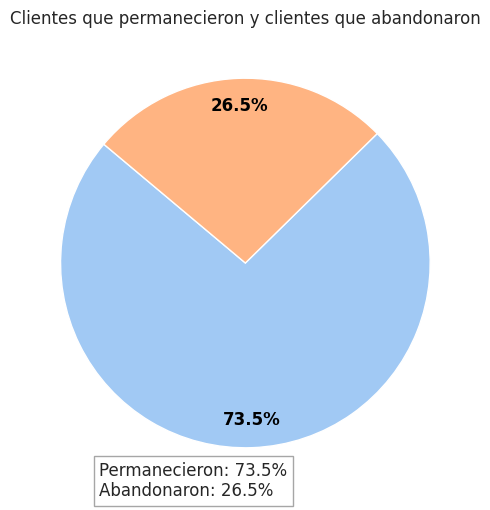

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

abandono_counts = df_DB['Abandono'].value_counts()
colors = sns.color_palette("pastel", 2)
# Gráfico de pastel
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(abandono_counts, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)
# Personalizar el gráfico
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')
#decripcion de las categorias
plt.gcf().text(
    0.33, 0.10,
    'Permanecieron: {:.1f}%\nAbandonaron: {:.1f}%'.format(
        abandono_counts[0] / abandono_counts.sum() * 100,
        abandono_counts[1] / abandono_counts.sum() * 100
    ), fontsize=12,
    ha='left',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.title('Clientes que permanecieron y clientes que abandonaron')
plt.ylabel('')
plt.show()

/tmp/ipython-input-339262160.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_rango = df_DB.groupby('Rango de Contrato')['Abandono'].mean().reset_index()
/tmp/ipython-input-339262160.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rango de Contrato', y='Abandono', data=abandono_por_rango, palette='viridis')


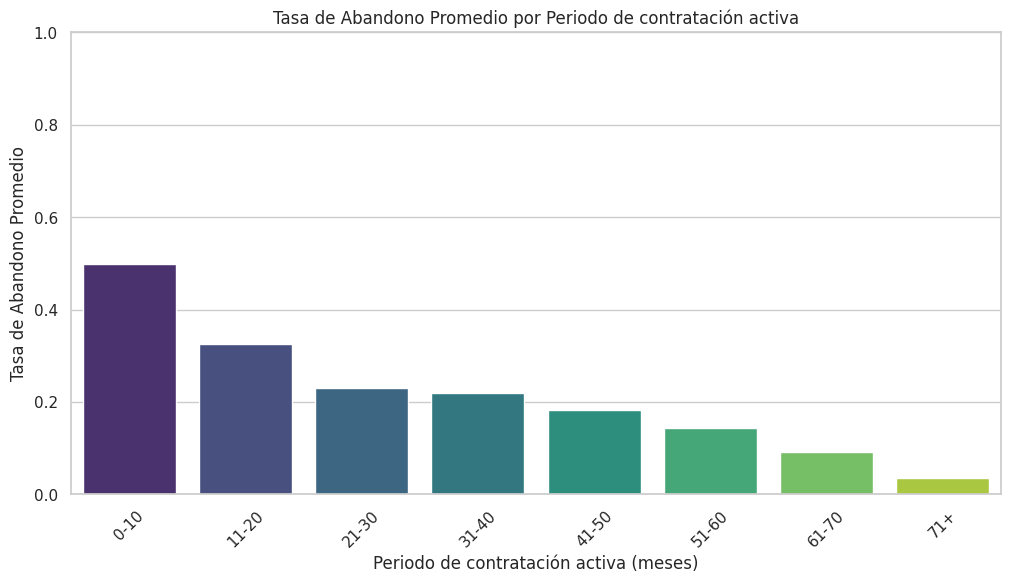

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los intervalos de meses
bins = [0, 10, 20, 30, 40, 50, 60, 70, df_DB['Duración del Contrato (meses)'].max()+1]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df_DB['Rango de Contrato'] = pd.cut(df_DB['Duración del Contrato (meses)'], bins=bins, labels=labels, right=False)

# Calcular la tasa de abandono promedio por rango de contratación
abandono_por_rango = df_DB.groupby('Rango de Contrato')['Abandono'].mean().reset_index()
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Rango de Contrato', y='Abandono', data=abandono_por_rango, palette='viridis')
plt.title('Tasa de Abandono Promedio por Periodo de contratación activa')
plt.xlabel('Periodo de contratación activa (meses)')
plt.ylabel('Tasa de Abandono Promedio')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-567999002.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tipo de Contrato', y='Abandono', data=df_DB, ci=None, palette='viridis')
/tmp/ipython-input-567999002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Contrato', y='Abandono', data=df_DB, ci=None, palette='viridis')


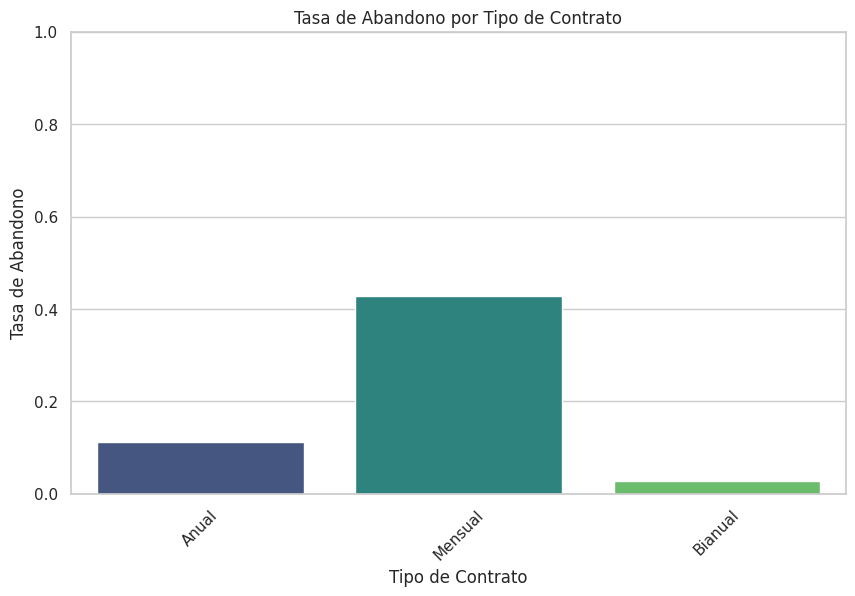

In [272]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Contrato', y='Abandono', data=df_DB, ci=None, palette='viridis')
plt.title('Tasa de Abandono por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Abandono')
plt.ylim(0, 1)  # Ajustar los límites del eje y para mayor claridad
plt.xticks(rotation=45)
plt.show()

In [275]:
# Crear la columna de cantidad de servicios adicionales, solo sumar cuando = 1

df_DB['Cantidad de Servicios Contratados'] = (
    (df_DB['Múltiples Líneas'] == 1).astype(int) +
    (df_DB['Seguridad en Línea'] == 1).astype(int) +
    (df_DB['Respaldo en Línea'] == 1).astype(int) +
    (df_DB['Protección del Dispositivo'] == 1).astype(int) +
    (df_DB['Soporte Técnico'] == 1).astype(int) +
    (df_DB['TV por Cable'] == 1).astype(int) +
    (df_DB['Streaming de Películas'] == 1).astype(int)
)

#solo mostrar algunas columnas
df_DB[['ID Cliente', 'Abandono','Servicio Telefónico', 'Múltiples Líneas', 'Servicio de Internet', 'Seguridad en Línea', 'Respaldo en Línea', 'Protección del Dispositivo', 'Soporte Técnico', 'TV por Cable', 'Streaming de Películas', 'Cantidad de Servicios Contratados']].head(20)

,ID Cliente,Abandono,Servicio Telefónico,Múltiples Líneas,Servicio de Internet,Seguridad en Línea,Respaldo en Línea,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Cantidad de Servicios Contratados
0,0002-ORFBO,0,1,0,DSL,0,1,0,1,1,0,3
1,0003-MKNFE,0,1,1,DSL,0,0,0,0,0,1,2
2,0004-TLHLJ,1,1,0,Fibra Óptica,0,0,1,0,0,0,1
3,0011-IGKFF,1,1,0,Fibra Óptica,0,1,1,0,1,1,4
4,0013-EXCHZ,1,1,0,Fibra Óptica,0,0,0,1,1,0,2
5,0013-MHZWF,0,1,0,DSL,0,0,0,1,1,1,3
6,0013-SMEOE,0,1,0,Fibra Óptica,1,1,1,1,1,1,6
7,0014-BMAQU,0,1,1,Fibra Óptica,1,0,0,1,0,0,3
8,0015-UOCOJ,0,1,0,DSL,1,0,0,0,0,0,1
9,0016-QLJIS,0,1,1,DSL,1,1,1,1,1,1,7


/tmp/ipython-input-2040717591.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y='Cantidad de Servicios Contratados', data=df_DB, palette='Set2')


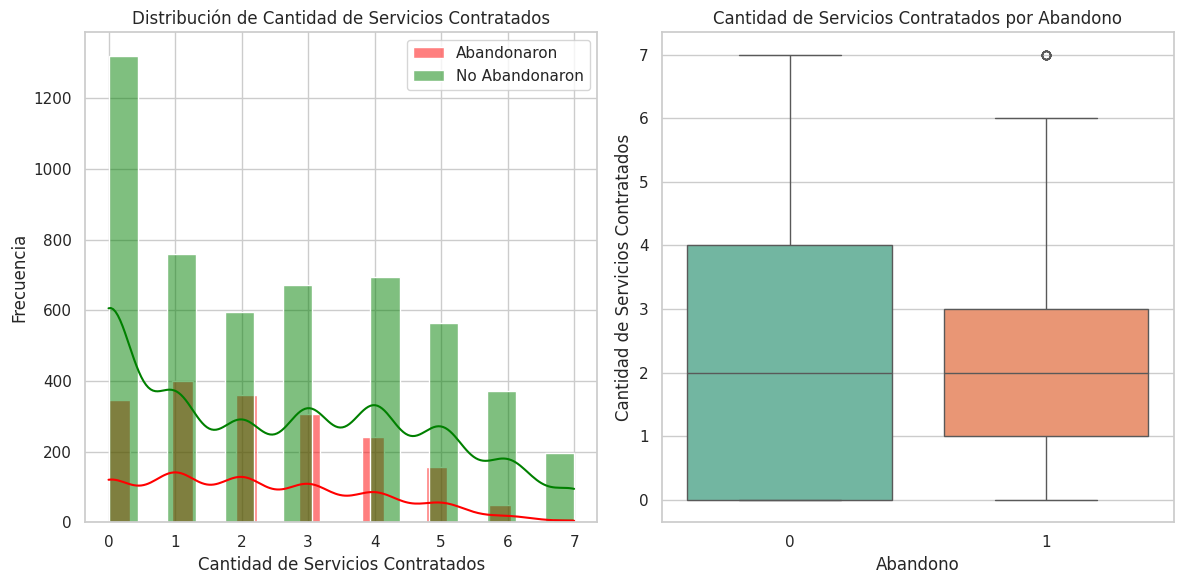

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos por abandono
abandonaron = df_DB[df_DB['Abandono'] == 1]
no_abandonaron = df_DB[df_DB['Abandono'] == 0]

# Histograma de Cantidad de Servicios Contratados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(abandonaron['Cantidad de Servicios Contratados'], kde=True, color='red', label='Abandonaron')
sns.histplot(no_abandonaron['Cantidad de Servicios Contratados'], kde=True, color='green', label='No Abandonaron')
plt.title('Distribución de Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios Contratados')
plt.ylabel('Frecuencia')
plt.legend()

# Boxplot de Cantidad de Servicios Contratados
plt.subplot(1, 2, 2)
sns.boxplot(x='Abandono', y='Cantidad de Servicios Contratados', data=df_DB, palette='Set2')
plt.title('Cantidad de Servicios Contratados por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Cantidad de Servicios Contratados')

plt.tight_layout()
plt.show()


#📄Informe final

# **Introducción**
  El presente informe detalla el análisis realizado sobre el conjunto de datos de la empresa de telecomunicaciones TelecomX, con el objetivo principal de entender los factores que impulsan el abandono de los clientes. La pérdida de clientes es un problema crítico para cualquier empresa de servicios por suscripción, al impactar su operación.
  El objetivo de este análisis es identificar los perfiles de clientes más propensos a abandonar la empresa y los atributos de servicio asociados a esta decisión. A través de la limpieza de datos, el análisis exploratorio y la visualización, se buscará generar insights que permitan a TelecomX desarrollar estrategias de retención más efectivas y proactivas.

## 1) *Limpieza y tratamiento:*
### *Importación*
  Se carga el archivo de datos desde una URL en formato JSON a una estructura adecuada para su análisis, en este caso un Dataframe.
  Luego, se verifica la información general de los datos revisando su estructura antes de iniciar el proceso de limpieza y transformación.
### *Limpieza*
#### Conversión de tipos de datos.
  Las columnas categóricas se convirtieron a tipo str, bool y float respectivamente.
  Se reemplazan errores por NaN y luego esos NaN por 0.
  Se eliminaron filas con valores vacíos en la columna Churn.
  Se verificaron posibles duplicados en customerID.
  ### *Procesado*
  #### *Normalización de columnas anidadas:*
  Se usó  pd.json_normalize para extraer y normalizar las columnas anidadas (customer, phone, internet, account) y se concatenaron al DataFrame principal.
  
  #### *Creación de nuevas columnas:*
   Se creó la columna Charges.Diary dividiendo el costo mensual entre 30 y redondeando a dos decimales.
  
  #### *Renombrado de columnas:*
   Se cambiaron los nombres de las columnas al español para mayor claridad.
  
  #### *Transformación de valores categóricos:*
   Se transformaron los valores "Yes"/"No" y similares a 1 y 0 en varias columnas.
  
  #### *Reemplazo de valores en columnas:*
  Se reemplazaron valores específicos en columnas como género, tipo de contrato, método de pago, etc., por versiones abreviadas o en español.

## 2) *Análisis exploratorio de datos:*
  ### *Análisis de variables:*
  Para todos las varialbes se observa un valor de conteo de 7043, lo que representearía la cantidad de filas en nuestro dataframe. Analisando en detalle cada una se observa:
### *Abandono:*
  Con una media de 0.265, esta variable binaria (0 para no abandona, 1 para abandona) sugiere que aproximadamente el 26.5% de los clientes han abandonado los servicios de la compañía.
## *Mayores de 65 años:*
  La media de 0.162 revela que alrededor del 16.2% de los clientes son personas mayores (65 años o más).
## *Pareja y personas dependientes al cliente:*
  La media de Partner es 0.4830 y la de Dependents es 0.2995. Esto significa que casi la mitad de los clientes tienen pareja, mientras que un tercio tiene dependientes. Estas variables son relevantes para entender la estructura familiar de los clientes.
## *Periodo de permanencia:*
  Con una media de 32.37 meses y una desviación estándar de 24.56, se observa una amplia dispersión en la antigüedad de los clientes. El 25% de los clientes tiene 9 meses o menos, mientras que el 75% supera los 55 meses, lo que sugiere una mezcla de clientes nuevos y leales.
## *Cargo mensual:*
  Con una media de 64.76 y una desviación estándar de 30.09, los cargos mensuales muestran una alta variabilidad. El rango va desde 18.25 hasta 118.75, sugiriendo diferentes niveles de consumo o planes de servicio entre los clientes.

## *Cargo total:*
  La media de 2279.73 y una desviación estándar de 2266.79 reflejan la gran dispersión en el gasto total acumulado por los clientes.

## ***Diagrama de Abandono-No abandono vs Clientes totales:***
Es la representación gráfica del porcentaje de clientes totales que abandonan y no abandonan el contrato con Telecom X.

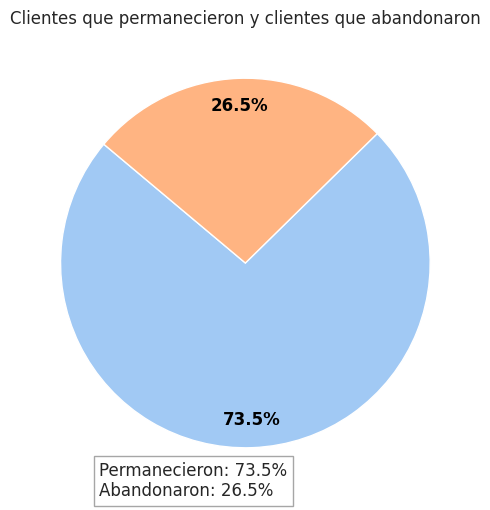

## ***Diagrama de barras Periodos activos vs Tasa de abandono:***
Hay evidencia de que el 50% de los que abandona el contrato con Telecom X son aquellos clientes que tiene un periodo contratado menor o igual a 10 meses.
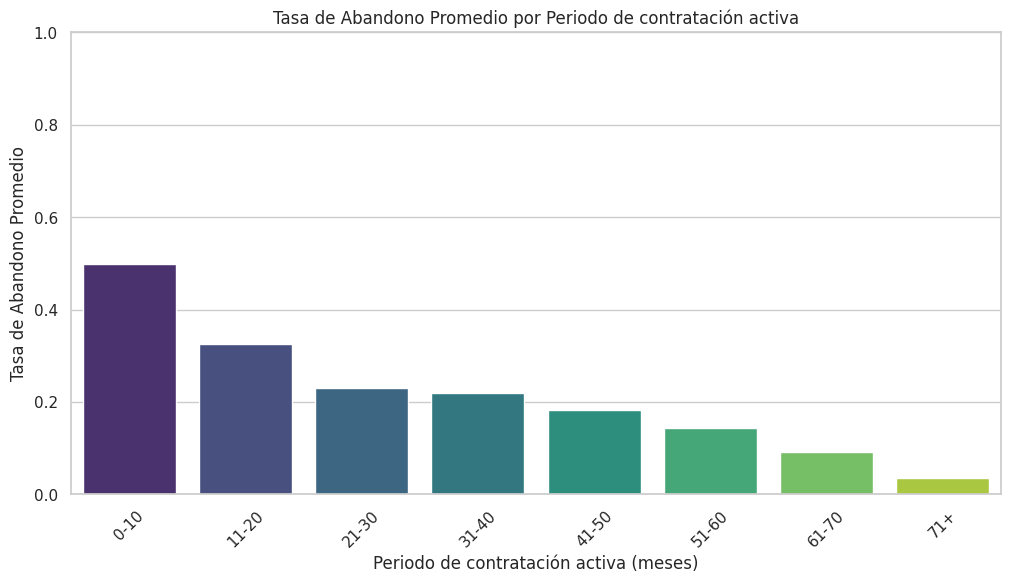

## **Recomendaciones:**
  Fomentar la contratación de múltiples servicios para aumentar la vinculación del cliente.
  Revisar y mejorar la calidad del servicio de fibra óptica y la atención a este segmento.
  Incentivar contratos de mayor duración mediante beneficios o descuentos.
  Promover métodos de pago automáticos para reducir la fricción y la evasión.
  Desarrollar estrategias de retención específicas para clientes nuevos, ya que la mayor parte del abandono ocurre en los primeros meses.
